In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from collections import defaultdict

# Read the dataset

In [2]:
annotations_dir = r'E:\AI_Project\Object_Detection\Object_Detection_Project\VOCtrainval_06-Nov-2007\VOCdevkit\VOC2007\Annotations'
images_dir = r'E:\AI_Project\Object_Detection\Object_Detection_Project\VOCtrainval_06-Nov-2007\VOCdevkit\VOC2007\JPEGImages'

img_lst = []        # Chứa list các ảnh đọc bằng opencv
label_lst = []      # Chứa list các labels
classnames = []     # Chứa list các classname
images_labels = []  # Chứa list [image_name, bounding box, classname] trong ảnh
count = 0
for xml_file in os.listdir(annotations_dir)[:20]:
    xml_filepath = os.path.join(annotations_dir, xml_file)
    tree = ET.parse(xml_filepath)
    root = tree.getroot()
    
    folder = root.find('folder').text
    image_filename = root.find('filename').text
    img_filepath = os.path.join(images_dir, image_filename)
    img = cv2.imread(img_filepath)
    # List chứa các ảnh đã đọc
    img_lst.append([image_filename, img])
    
    image_bboxs = []
    for obj in tree.findall('object'):
        classname = obj.find('name').text
        if(classname not in classnames):
            classnames.append(classname)
        
        x_min = int(obj.find('bndbox/xmin').text)
        y_min = int(obj.find('bndbox/ymin').text)
        x_max = int(obj.find('bndbox/xmax').text)
        y_max = int(obj.find('bndbox/ymax').text)
        image_bboxs.append([classname, [x_min, y_min, x_max, y_max]])
        
    images_labels.append([image_filename, image_bboxs])

In [3]:
print(f"Number of class: {len(classnames)}")
print(f"Classnames: {classnames}")

Number of class: 11
Classnames: ['chair', 'car', 'horse', 'person', 'bicycle', 'cat', 'dog', 'train', 'aeroplane', 'diningtable', 'tvmonitor']


In [4]:
print(images_labels[2])

['000009.jpg', [['horse', [69, 172, 270, 330]], ['person', [150, 141, 229, 284]], ['person', [285, 201, 327, 331]], ['person', [258, 198, 297, 329]]]]


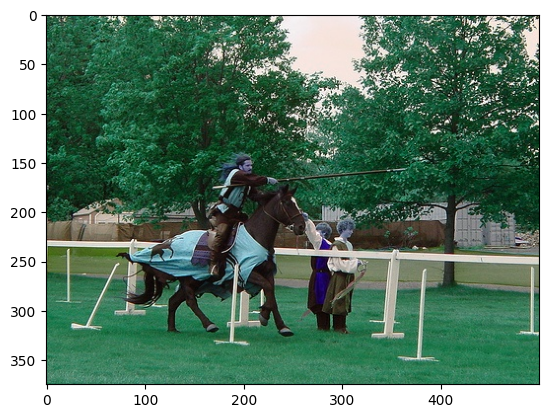

In [5]:
plt.imshow(img_lst[2][1])

# Preprocessing

In [ ]:
#.....